# Lista 1 (9 pkt.)

In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np

## Zadanie 1 (1 pkt.)

Zaimplementuj szyfr Cezara. Napisz funkcję **Cezar(text, key)** tak aby jako argumenty przyjmowała tekst do zaszyfrowania oraz klucz a zwracała zaszyfrowany tekst. Funkcja ta dostając jako argumenty zaszyfrowany tekst oraz **-key** (klucz, ktorym zaszyfrowano tekst ze znakiem minus) będzie zwracała odszyfrowany tekst. Funkcja powinna przejść testy, czyli powinna 8 razy zwrócić **True**.

Pamiętaj o polskich znakach. Szyfrujemy tylko litery, natomiast cyfry, znaki interpunkcyjne i białe znaki zostają bez zmian. Wielkie litery po zaszyfrowaniu są również wielkie. Użyj poniższego alfabetu.

In [2]:
alphabet = ['a','ą', 'b', 'c', 'ć', 'd', 'e', 'ę', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'ł', 'm', 
           'n', 'ń', 'o','ó', 'p', 'q','r', 's', 'ś', 't', 'u','v', 'w', 'x','y', 'z','ź','ż']

Przy implementacji mogą być przydatne takie elementy biblioteki string jak: **string.punctuation, string.whitespace, string.digits, upper(), lower(), isupper()**

In [3]:
def Cezar(text, key):
    encrypted_text = ""
    
    immutable = string.punctuation + string.whitespace + string.digits
    
    for char in text:
        if char in immutable:
            encrypted_text += char
            continue
        
        index = alphabet.index(char.lower())
        new_index = (index + key) % len(alphabet)
        
        if char.isupper():
            encrypted_text += alphabet[new_index].upper()
        else:
            encrypted_text += alphabet[new_index]
        
    return encrypted_text

In [4]:
print(Cezar('Ala ma kota.',3)=='Cnc oc mqwc.')
print(Cezar('Ala ma kota.',20)=='Óżó ąó źćió.')
print(Cezar('Ala ma 2 koty.',5)=='Dod pd 2 ńsyą.')
print(Cezar('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.',7)
                  =='Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.')
print(Cezar('Cnc oc mqwc.',-3)=='Ala ma kota.')
print(Cezar('Óżó ąó źćió.',-20)=='Ala ma kota.')
print(Cezar('Dod pd 2 ńsyą.',-5)=='Ala ma 2 koty.')
print(Cezar('Jęxkrsk eępk, vxuesc źxżj,\nGkćyńpsk ćqtxćkhćksńę!\nVxćkecźchn óyćźęqźuą eęjks hżj\nSńk ąxuhń jt ńyźsńksńę.',-7)
                  =='Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 2 (1 pkt.)

Wiedząc, że poniższy tekst zaszyfrowano metodą Cezara, odszyfruj go metodą "brute force". Co to za cytat?

In [5]:
text = 'Hćcrek okyź hćęy? Okzpń sńóź rsńk t źt sńk vcźę, ąńkr. Okzpń vcźęofhkrż żyńqżol ącźqżręhćci, sńk ąńkr.'

In [6]:
for i in range(1, len(alphabet) + 1):
    print(f'For key {i} text: {Cezar(text, -i)}')

For key 1 text: Gcbqdj ńjxz gcex? Ńjyón rnoz qrnj ś zś rnj ubze, anjq. Ńjyón ubzeńęgjqź źxnpźńk abzpźqegcbh, rnj anjq.
For key 2 text: Fbąpći niwy fbdw? Nixom qmńy pqmi s ys qmi tąyd, żmip. Nixom tąydnefipz zwmóznj żąyózpdfbąg, qmi żmip.
For key 3 text: Ęąaóch mhvx ęąćv? Mhwńł płnx ópłh r xr płh śaxć, źłhó. Mhwńł śaxćmdęhóy yvłoymi źaxoyóćęąaf, płh źłhó.
For key 4 text: Eażobg łguw eacu? Łgvnl ólmw oólg q wq ólg sżwc, zlgo. Łgvnl sżwcłćegox xulńxłh zżwńxoceażę, ólg zlgo.
For key 5 text: Dżźńąf lftv dżbt? Lfumk okłv ńokf p vp okf rźvb, ykfń. Lfumk rźvblcdfńw wtknwlg yźvnwńbdżźe, okf ykfń.
For key 6 text: Ćźznaę kęśu ćźąś? Kętłj ńjlu nńję ó uó ńję qzuą, xjęn. Kętłj qzuąkbćęnv vśjmvkf xzumvnąćźzd, ńję xjęn.
For key 7 text: Czymże jest czas? Jeśli nikt mnie o to nie pyta, wiem. Jeśli pytającemu usiłuję wytłumaczyć, nie wiem.
For key 8 text: Byxłźd idrś byżr? Idskh mhjś łmhd ń śń mhd óxśż, vhdł. Idskh óxśżiabdłt trhltie vxśltłżbyxc, mhd vhdł.
For key 9 text: Ąxwlzć hćqs ąxźq? Hćrjg łgis lłg

Tekst jest autorstwa św. Augustyna o tytule Wyznania 

## Zadanie 3 (2 pkt.)

Plik **'ksiazka1.txt'** zawiera tekst pewnej książki zaszyfrowany metodą Cezara. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Do wczytania pliku możesz użyć poniższego kodu.

In [7]:
file=open('data_1/ksiazka1.txt', encoding='utf8')
book=file.read()
file.close()

Słownik **frequency** zawiera częstotliwości występowania liter w języku polskim.

In [8]:
frequency = {'a':0.0891,'ą':0.0099, 'b':0.0147, 'c':0.0396, 'ć':0.004, 'd':0.0325, 'e':0.0766, 'ę':0.0111, 'f':0.003, 
                 'g':0.0142, 'h':0.0108, 'i':0.0821, 'j':0.0228, 'k':0.0351, 'l':0.021, 'ł':0.0182,'m':0.028, 'n':0.0552, 
                 'ń':0.002, 'o':0.0775,'ó':0.0085, 'p':0.0313, 'q':0.0014, 'r':0.0469, 's':0.0432,'ś':0.0066, 't':0.0398,
                 'u':0.025, 'v': 0.0004, 'w':0.0465 ,'x':0.0002,'y':0.0376, 'z':0.0564,'ź':0.0006,'ż':0.0083}

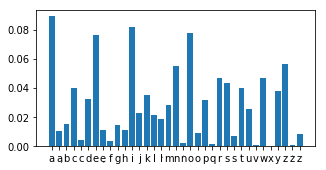

In [9]:
plt.figure(figsize=(5,2.5))
plt.bar(frequency.keys(), frequency.values())
plt.show()

In [10]:
book_letters = {key: 0 for key in alphabet}
total_letters = 0

In [11]:
for char in book:
    if char.lower() not in alphabet:
        continue
    else:
        book_letters[char.lower()] += 1
        total_letters += 1

In [12]:
book_frequency = {key: book_letters[key] / total_letters for key in book_letters}

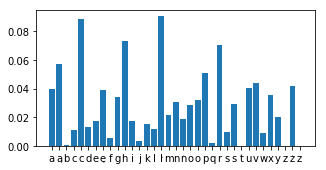

In [13]:
plt.figure(figsize=(5,2.5))
plt.bar(book_frequency.keys(), book_frequency.values())
plt.show()

In [14]:
text = book[:100]

print(Cezar(text, -(alphabet.index('ł') - alphabet.index('a'))))
print(Cezar(text, -(alphabet.index('ć') - alphabet.index('a'))))

Łfd A



Ńkłyh

Ń hgćefuef-ńkużfwead bśuax Szjóba cxró Xźahł, fąupópes esąkłsjkpxą uóńacapsuąa ń lńa
Tom I



Wstęp

W północno-wschodnim kącie Afryki leży Egipt, ojczyzna najstarszej cywilizacji w świ


In [29]:
decrypted_file = open('ksiazka1_decrypted.txt', 'w', encoding="utf-8")
decrypted_text = Cezar(book, -(alphabet.index('ć') - alphabet.index('a')))
decrypted_file.write(decrypted_text)
decrypted_file.close()

In [31]:
decrypted_text[-100:]

' Ldśsnwpł, Adźećń Ćtjfępi, Qheźopł, Fdutź Q-Ć, óźvwyźv, Rżłvhó, Ldźńgq mW.\n\nGWJZ 978-83-288-5190-0\n\n'

Książka to Faraon Bolesława Prusa

## Zadanie 4 (2 pkt.)

Napisz dwie funkcje, szyfrującą i deszyfrującą, dla szyfru Vign
ere'a. Funkcja **Vignere_encrypt(text, key)** przyjmuje jako argumenty tekst do zaszyfrowania oraz klucz w postaci słowa. Podobnie funkcja **Vignere_decrypt(text, key)** przyjmuje jako argumenty tekst zaszyfrowany oraz klucz w postaci słowa. Może być przydatne skorzystanie z zamiany liter na liczby (tzn. na liczby określające pozycję litery w alfabecie):

In [16]:
numbers_to_letters=dict()
letters_to_numbers=dict()
for i,l in enumerate(alphabet):
    numbers_to_letters[i]=l
    letters_to_numbers[l]=i

In [17]:
def Vignere_encrypt(text, key):
    encrypted_text = ""
    i = 0
    
    immutable = string.punctuation + string.whitespace + string.digits
    
    for char in text:
        if char in immutable:
            encrypted_text += char
            continue
        
        char_index = letters_to_numbers[char.lower()]
        key_index = letters_to_numbers[key[i % len(key)]] 
        new_index = (char_index + key_index) % len(alphabet)
        
        if char.isupper():
            encrypted_text += numbers_to_letters[new_index].upper()
        else:
            encrypted_text += numbers_to_letters[new_index]
            
        i +=1
        
    return encrypted_text

In [18]:
def Vignere_decrypt(text, key):
    reversed_key = ""

    immutable = string.punctuation + string.whitespace + string.digits
    
    for char in key:
        if char in immutable:
            reversed_key += char
        else:
            reversed_key += numbers_to_letters[(len(alphabet) - letters_to_numbers[char]) % len(alphabet)]

    return Vignere_encrypt(text, reversed_key)

In [19]:
print(Vignere_encrypt('Ala ma kota.','ela')=='Eva ql kśda.')
print(Vignere_encrypt('Ala ma kota.','tygrys')=='Thg ćy bhqg.')
print(Vignere_encrypt('Ala ma 2 koty.','indywidualistyczny')=='Iyd jw 2 ssńy.')
print(Vignere_encrypt('Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.','asnyk')
                  =='Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.')
print(Vignere_decrypt('Eva ql kśda.','ela')=='Ala ma kota.')
print(Vignere_decrypt('Thg ćy bhqg.','tygrys')=='Ala ma kota.')
print(Vignere_decrypt('Iyd jw 2 ssńy.','indywidualistyczny')=='Ala ma 2 koty.')
print(Vignere_decrypt('Dsdbwnx myue, hdmjnó fodd,\nTrvbicżb hłfdvocprksa!\nHdvożófumh bevćaćfmę żsqbx cmq\nKse ńdmmi wą ębtevbxis.','asnyk')
                  =='Daremne żale, próżny trud,\nBezsilne złorzeczenia!\nPrzeżytych kształtów żaden cud\nNie wróci do istnienia.')

True
True
True
True
True
True
True
True


## Zadanie 5 (3 pkt.)

Plik **'ksiazka2.txt'** zawiera tekst pewnej książki zaszyfrowany metodą Vignere'a. Dokonaj analizy statystycznej liter i na tej podstawie znajdź klucz oraz odszyfruj tekst. Jaka to książka?

Wskazówka I: Zauważ, że w metodzie Vignere'a co $n$-ta litera (gdzie $n$ to długość klucza) jest zaszyfrowana metodą Cezara.

Wskazówka II: Najpierw ustal długość klucza $n$.

Do wczytania pliku możesz użyć poniższego kodu.

In [20]:
file = open('data_1/ksiazka2.txt', encoding='utf8')
book = file.read()
file.close()

In [21]:
import re
pattern = "[" + re.escape("".join(string.punctuation + string.whitespace + string.digits)) + "]"
text = re.sub(pattern, "", book).lower()

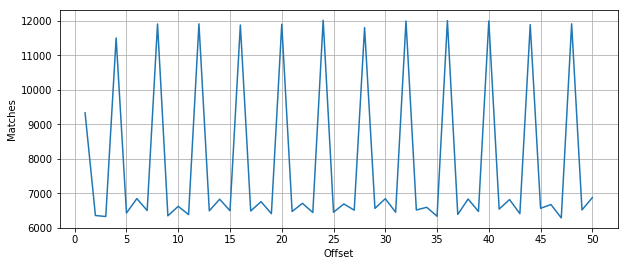

In [22]:
offsets = []
matches_list = []

for offset in range(1, 51):
    matches = 0
    for i in range(len(text) - offset):
        if text[i] == text[i + offset]:
            matches += 1
            
    matches_list.append(matches)
    offsets.append(offset)

plt.figure(figsize=(10, 4))
plt.plot(offsets, matches_list)
plt.xticks(np.arange(0, offsets[-1] + 1, step=5))
plt.xlabel('Offset')
plt.ylabel('Matches')
plt.grid()
plt.show()

In [23]:
key_length = 4
new_key = ""

max_frequency_polish = max(frequency.values())
index_polish = [key for key, value in frequency.items() if value == max_frequency_polish][0]

for n in range(key_length):
    text_part = text[n::key_length]
    
    text_part_letters = {key: 0 for key in alphabet}
    total_letters = 0
    
    for char in text_part:
        if char.lower() not in alphabet:
            continue
        else:
            text_part_letters[char.lower()] += 1
            total_letters += 1
            
    text_part_frequency = {key: text_part_letters[key] / total_letters for key in text_part_letters}
    
    max_frequency = max(text_part_frequency.values())
    index = [key for key, value in text_part_frequency.items() if value == max_frequency][0]
    
    new_key_index = (alphabet.index(index) - alphabet.index(index_polish)) % len(alphabet)
    new_key += numbers_to_letters[new_key_index]

print(new_key)

glob


In [25]:
decrypted_file = open('ksiazka2_decrypted.txt', 'w', encoding="utf-8")
decrypted_text = Vignere_decrypt(book, new_key)
decrypted_file.write(decrypted_text)
decrypted_file.close()

In [28]:
decrypted_text[-100:]

' Małgosia, Bartek Wilczek, Natalia, Hania N-W, daromar, Konrad, Marcin eL.\n\nISBN 978-83-288-5190-0\n\n'

Książka to W 80 dni dookoła świata